# Import Library

In [828]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as st
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
!pip install imblearn

In [777]:
url = 'https://raw.githubusercontent.com/ShvrCol/ALP_Data-Mining/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv'
df = pd.read_csv(url)
df.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


## EDA

In [778]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [779]:
df.duplicated().any()

False

In [780]:
df.isna().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

## Normalization

In [781]:
df_norm = df.copy()
df_norm['gender'] = df_norm['gender'].replace(1, 'Male')
df_norm['gender'] = df_norm['gender'].replace(2, 'Female')
df_norm

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,Male,15,11.00,6.0,1.0,30,25.0,0
1,Male,27,11.75,NaN,1.0,208,6.0,0
2,Male,32,12.00,9.0,1.0,43,50.0,0
3,Male,33,1.75,7.0,2.0,379,7.0,0
4,Male,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,Female,51,4.00,1.0,1.0,65,7.0,1
86,Female,51,6.00,6.0,NaN,80,2.0,1
87,Female,52,2.25,5.0,1.0,63,7.0,1
88,Female,53,10.00,1.0,2.0,30,25.0,1


In [782]:
df_norm['Result_of_Treatment'] = df_norm['Result_of_Treatment'].replace(0, 'Tidak Ada Kemajuan')
df_norm['Result_of_Treatment'] = df_norm['Result_of_Treatment'].replace(1, 'Ada Kemajuan')
df_norm

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,Male,15,11.00,6.0,1.0,30,25.0,Tidak Ada Kemajuan
1,Male,27,11.75,NaN,1.0,208,6.0,Tidak Ada Kemajuan
2,Male,32,12.00,9.0,1.0,43,50.0,Tidak Ada Kemajuan
3,Male,33,1.75,7.0,2.0,379,7.0,Tidak Ada Kemajuan
4,Male,34,5.00,7.0,3.0,64,7.0,Tidak Ada Kemajuan
...,...,...,...,...,...,...,...,...
85,Female,51,4.00,1.0,1.0,65,7.0,Ada Kemajuan
86,Female,51,6.00,6.0,NaN,80,2.0,Ada Kemajuan
87,Female,52,2.25,5.0,1.0,63,7.0,Ada Kemajuan
88,Female,53,10.00,1.0,2.0,30,25.0,Ada Kemajuan


In [783]:
df_normal = df_norm.interpolate(method = 'linear')
df_normal

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,Male,15,11.00,6.0,1.0,30,25.0,Tidak Ada Kemajuan
1,Male,27,11.75,7.5,1.0,208,6.0,Tidak Ada Kemajuan
2,Male,32,12.00,9.0,1.0,43,50.0,Tidak Ada Kemajuan
3,Male,33,1.75,7.0,2.0,379,7.0,Tidak Ada Kemajuan
4,Male,34,5.00,7.0,3.0,64,7.0,Tidak Ada Kemajuan
...,...,...,...,...,...,...,...,...
85,Female,51,4.00,1.0,1.0,65,7.0,Ada Kemajuan
86,Female,51,6.00,6.0,1.0,80,2.0,Ada Kemajuan
87,Female,52,2.25,5.0,1.0,63,7.0,Ada Kemajuan
88,Female,53,10.00,1.0,2.0,30,25.0,Ada Kemajuan


In [784]:
df_new = df.interpolate(method = 'linear')
df_new

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,7.5,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


### Mengapa menggunakan Interpolate, karena di data ini dengan menggunakan interpolate dapat lebih akurat daripada metode lain, seperti menggunakan nilai rata-rata atau median untuk mengisi nilai yang hilang. Ini karena interpolasi memperhitungkan nilai titik data di sekitarnya, yang dapat memberikan estimasi nilai yang hilang yang lebih akurat. Sehingga menjadikannya pilihan yang baik untuk mengisi nilai yang hilang dalam aplikasi waktu nyata.

In [785]:
df_new.isna().any()

gender                 False
age                    False
Time                   False
Number_of_Warts        False
Type                   False
Area                   False
induration_diameter    False
Result_of_Treatment    False
dtype: bool

In [786]:
df_new

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,7.5,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# Data Preprocessing

### Classification using KNN

In [787]:
X = df_new.drop(['Result_of_Treatment'], axis = 1)
y = df_new['Result_of_Treatment']

In [788]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [789]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [790]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 1 1]


In [791]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[1 1]
 [0 7]]
Accuracy Score:  0.8888888888888888


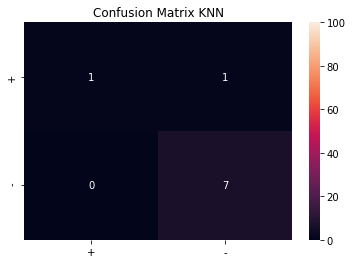

In [792]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['+', '-'], yticklabels=['+', '-'], vmax=100, vmin=0)
plt.title('Confusion Matrix KNN')
plt.show()

### Linear Regression

In [793]:
X = df_new.drop(['Result_of_Treatment'], axis = 1)
y = df_new['Result_of_Treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [794]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.predict(X_test))

[0.49829969 0.79943411 0.87300183 0.7844585  0.92889633 0.66073732
 0.78910785 0.52376616 0.85278274]


In [795]:
reg = linear_model.LinearRegression()
reg.fit(df_new.drop(['Result_of_Treatment'], axis = 1),df_new['Result_of_Treatment'])

LinearRegression()

In [796]:
reg.coef_

array([ 1.99467104e-02, -4.17117474e-03, -4.77405679e-02, -1.68816897e-03,
       -6.74411794e-03,  8.94498878e-05, -2.28210315e-03])

In [797]:
reg.intercept_

1.2792166533366187

In [798]:
rms = sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
print(rms)

0.2913985285181321


### Clustering using KMeans

In [807]:
df_new.dtypes

gender                   int64
age                      int64
Time                   float64
Number_of_Warts        float64
Type                   float64
Area                     int64
induration_diameter    float64
Result_of_Treatment      int64
dtype: object

In [815]:
#Label Encoder
le = LabelEncoder()
df_new['Time'] = le.fit_transform(df_new['Time'])
df_new['Number_of_Warts'] = le.fit_transform(df_new['Number_of_Warts'])
df_new['Type'] = le.fit_transform(df_new['Type'])
df_new['induration_diameter'] = le.fit_transform(df_new['induration_diameter'])

In [816]:
#scaling
sd_scaler = StandardScaler()
df_scale = sd_scaler.fit_transform(df_new.to_numpy())
df_scale = pd.DataFrame(df_scale, columns=['gender', 'age','Time','Number_of_Warts','Type', 'Area','induration_diameter', 'Result_of_Treatment'])
df_scale.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,-1.093216,-1.318656,1.232276,-0.093077,-0.914638,-0.483609,0.850554,-1.933091
1,-1.093216,-0.332404,1.488604,0.359732,-0.914638,0.826625,-0.531212,-1.933091
2,-1.093216,0.078535,1.574047,0.812541,-0.914638,-0.387918,1.955967,-1.933091
3,-1.093216,0.160723,-1.672781,0.133327,0.313980,2.085334,-0.254859,-1.933091
4,-1.093216,0.242910,-0.818353,0.133327,1.542599,-0.233339,-0.254859,-1.933091


In [817]:
# set the parameter for evaluating K
SSE = []
# check the inertia for each K
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_new)
 SSE.append(kmeans.inertia_)

C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak o

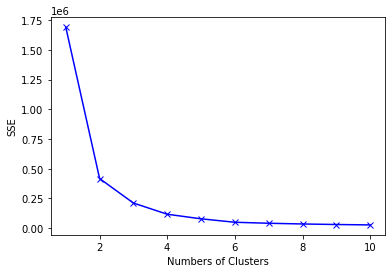

In [818]:
#display elbow knee
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [819]:
#Summarize the Analysis Result
k = KneeLocator(range(1,11), SSE, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  3


In [822]:
#Clustering Model K-Means
kmeans = KMeans(n_clusters=5, random_state = 0, init = 'random', max_iter=100)
y_kmeans = kmeans.fit_predict(df_scale)
y_kmeans
df_new['K Means'] = y_kmeans

C:\Users\Erikson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [823]:
df_new.groupby('K Means').agg(
gender = ('gender', pd.Series.mean), 
age = ('age', pd.Series.mean),
Time = ('Time', pd.Series.mean),
Number_of_Warts = ('Number_of_Warts', pd.Series.mean),
Type = ('Type', pd.Series.mean),
Area = ('Area', pd.Series.mean),
induration_diameter = ('induration_diameter', pd.Series.mean), 
Result_of_Treatment = ('Result_of_Treatment', pd.Series.mean), Count = ('K Means', 'count')
)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Count
K Means,,,,,,,,,
0,1.375000,30.875000,21.000000,5.000000,1.000000,476.375000,4.500000,0.875000,8
1,1.230769,31.384615,15.538462,8.846154,3.538462,51.461538,2.769231,0.923077,13
2,1.666667,29.333333,21.952381,3.619048,0.690476,58.261905,3.738095,0.976190,42
3,1.545455,28.636364,8.818182,7.363636,3.090909,52.363636,11.272727,1.000000,11
4,1.562500,37.000000,34.562500,6.187500,1.062500,69.375000,5.625000,0.000000,16


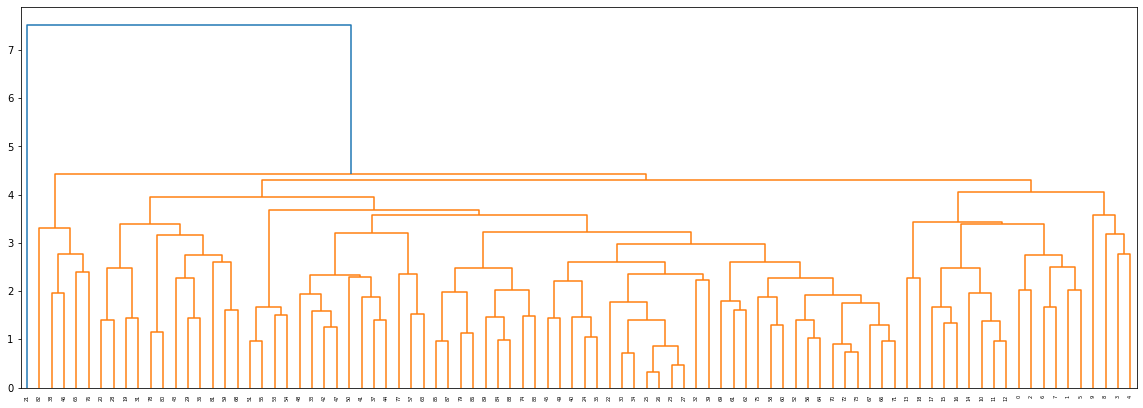

In [824]:
#display with the Dendogram for each Linkage
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='average', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

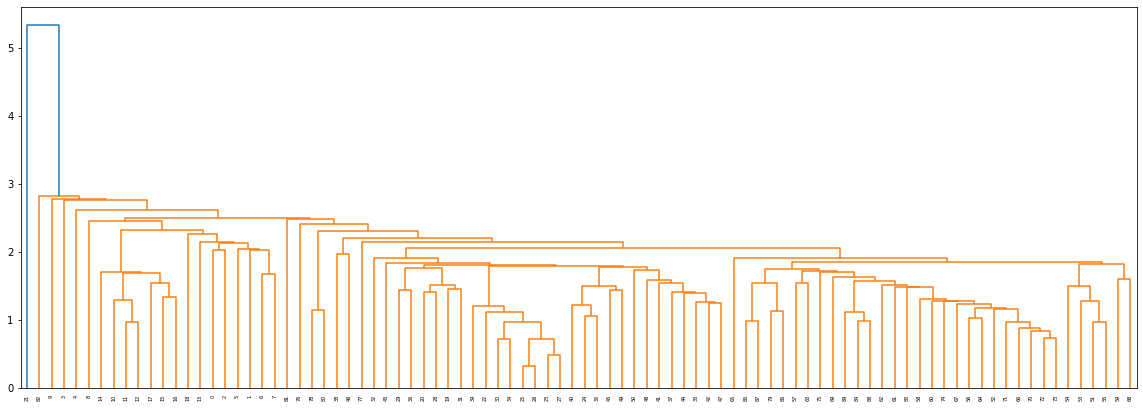

In [825]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='single', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

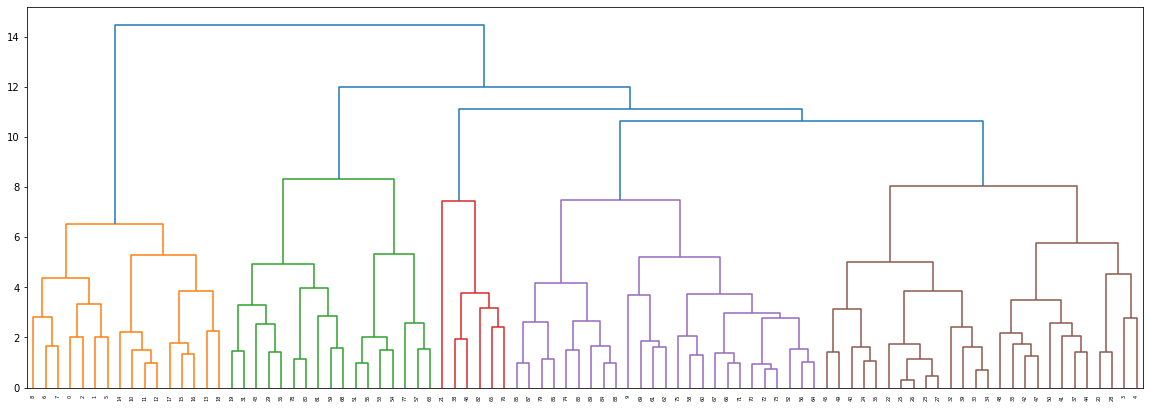

In [826]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='ward', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

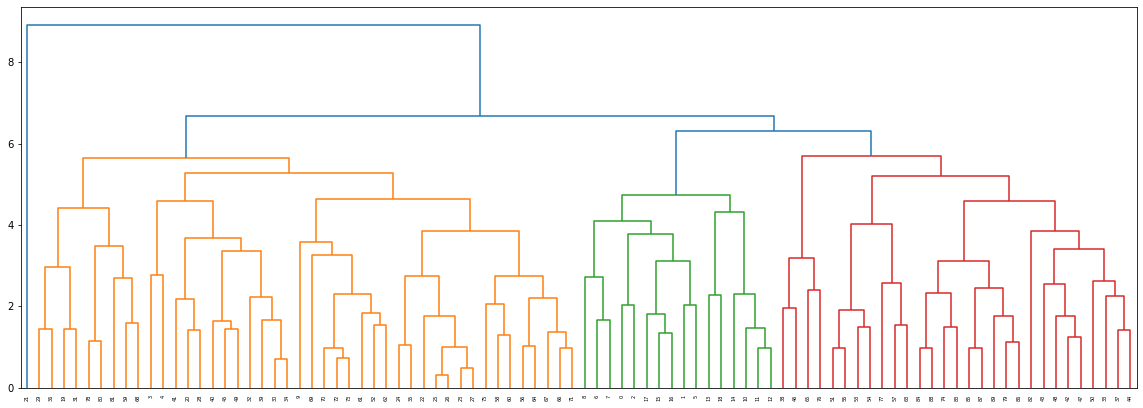

In [827]:
plt.figure(figsize=(20,7))
linkage_data = linkage(df_scale, method='complete', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

# Deal with Imbalance Data

<AxesSubplot:xlabel='Result_of_Treatment', ylabel='Count'>

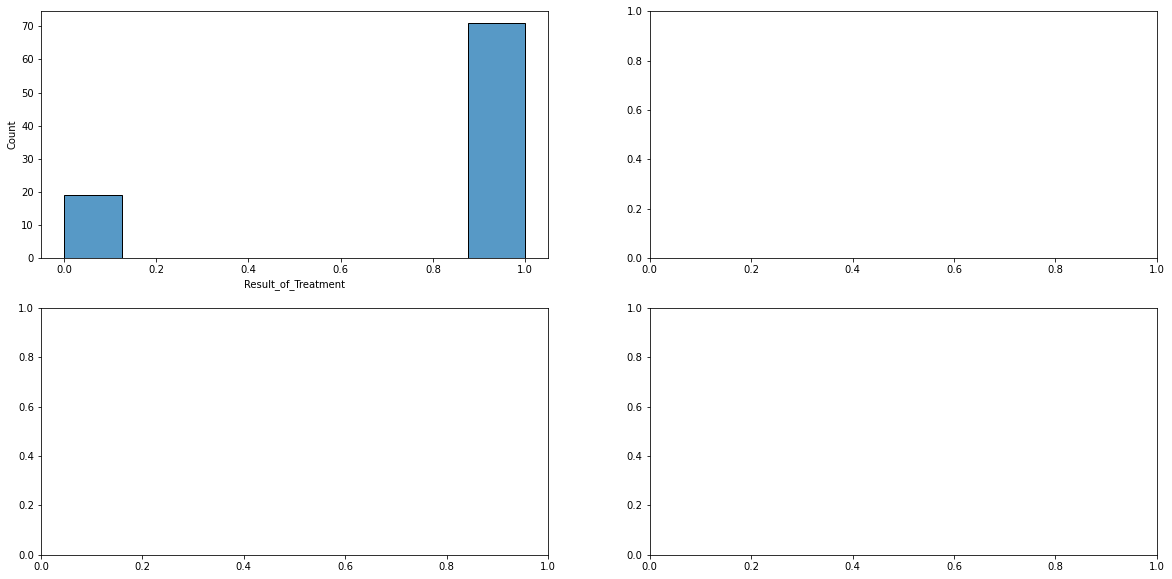

In [799]:
fig,axes = plt.subplots(2,2,figsize=(20,10))
sns.histplot(data=df,x='Result_of_Treatment',ax=axes[0,0])

In [800]:
x = df_new.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

In [801]:
sm = SMOTE(random_state=1)
x_sampling , y_sampling = sm.fit_resample(x,y)

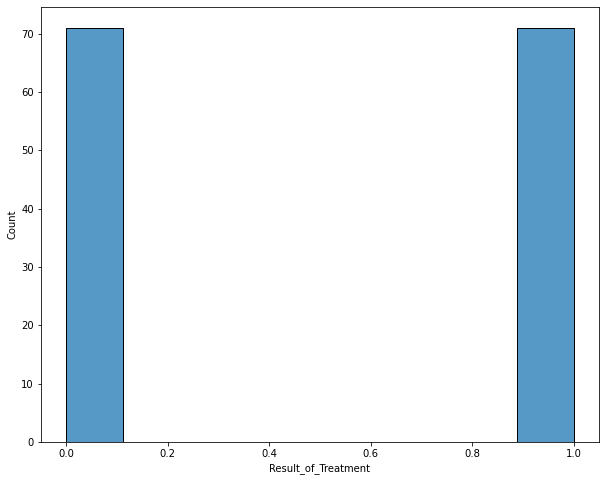

In [802]:
fig = plt.subplots(figsize=(10,8))
sns.histplot(data=y_sampling)
plt.show()